# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import seaborn as sns
import requests
import datetime
from datetime import date
import plotly

# Pre-processing data

In [2]:
day = '03-04-2023'
day2 = '03042023'
today = datetime.date(2023,4,3)

In [3]:
data = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\dades_sivic_' + day2 + '.xlsx')

In [4]:
data.head()

,data,diagnostic,sexe,grup_edat,casos
0,2016-02-18,Grip,Home,5 a 14,260
1,2015-01-10,ILI,Home,0,22
2,2018-02-21,ILI,Home,3 i 4,227
3,2018-03-08,ILI,Home,0,131
4,2018-09-27,ILI,Home,15 a 44,886


In [5]:
data['data'] =  pd.to_datetime(data['data'], dayfirst=False, format = "%Y-%m-%d")

In [6]:
poblacio2012 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = '2012')
poblacio2019 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = '2019')
poblacio2020 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = '2020')

In [7]:
sarscov2 = data[data.diagnostic == 'COVID-19']
bronquiolitis = data[data.diagnostic == 'Bronquiolitis']
influenza = data[data.diagnostic == 'Grip']

sarscov2.sort_values(by=['data'], ascending=True, inplace=True)
influenza.sort_values(by=['data'], ascending=True, inplace=True)
bronquiolitis.sort_values(by=['data'], ascending=True, inplace=True)

C:\Users\A. Perramon Malavez\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
sarscov2.head()

,data,diagnostic,sexe,grup_edat,casos
180990,2019-12-01,COVID-19,Home,15 a 44,1
54798,2019-12-01,COVID-19,Dona,15 a 44,1
32321,2019-12-02,COVID-19,Home,15 a 44,1
136377,2019-12-02,COVID-19,Dona,15 a 44,1
11023,2019-12-03,COVID-19,Dona,45 a 59,1


In [9]:
influenza.head()

,data,diagnostic,sexe,grup_edat,casos
67499,2011-09-01,Grip,Home,70 a 79,1
56707,2011-09-01,Grip,Dona,45 a 59,1
8926,2011-09-01,Grip,Home,15 a 44,2
20750,2011-09-01,Grip,Dona,15 a 44,4
89626,2011-09-02,Grip,Home,45 a 59,2


In [10]:
bronquiolitis.head()

,data,diagnostic,sexe,grup_edat,casos
179445,2011-09-01,Bronquiolitis,Dona,45 a 59,3
148908,2011-09-01,Bronquiolitis,Dona,1 i 2,1
55896,2011-09-01,Bronquiolitis,Home,80 o més,1
26764,2011-09-01,Bronquiolitis,Home,0,6
44695,2011-09-01,Bronquiolitis,Home,1 i 2,1


In [11]:
sarscov2_tottot = sarscov2[['data','casos']]
sarscov2_tottot.index = pd.DatetimeIndex(sarscov2_tottot.data).floor('D')
sarscov2_tottot = sarscov2_tottot.resample('D').sum()

sarscov2_tot = sarscov2_tottot.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where(sarscov2_tot.index.year == 2019)
poptot = poblacio2019.Total.sum()
inc_sarscov2_tot = 1e5*sarscov2_tot.iloc[locs[0][0]].div(poptot, fill_value=0)

for j in locs[0][1:]:
    inc_sarscov2_tot = pd.concat([inc_sarscov2_tot,1e5*sarscov2_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

for yy in np.arange(2020,2024):
    if yy  == 2023:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_tot.index.year == yy))
    poptot = poblacio.Total.sum()
    for j in locs[0]:
        inc_sarscov2_tot = pd.concat([inc_sarscov2_tot,1e5*sarscov2_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

inc_sarscov2_tot.index = sarscov2_tot.index

sarscov2_0 = sarscov2[sarscov2.grup_edat == 0]
sarscov2_00 = sarscov2_0[['data','casos']]
sarscov2_12 = sarscov2[sarscov2.grup_edat == '1 i 2']
sarscov2_1212 = sarscov2_12[['data','casos']]
sarscov2_34 = sarscov2[sarscov2.grup_edat == '3 i 4']
sarscov2_3434 = sarscov2_34[['data','casos']]
sarscov2_514 = sarscov2[sarscov2.grup_edat == '5 a 14']
sarscov2_514514 = sarscov2_514[['data','casos']]

sarscov2_00.index = pd.DatetimeIndex(sarscov2_00.data).floor('D')
sarscov2_00 = sarscov2_00.resample('D').sum()

sarscov2_0 = sarscov2_00.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where(sarscov2_0.index.year == 2020)
pop0 = poblacio2020[poblacio2020.Edat == '0 a.'].Total.values[0]
inc_sarscov2_0 = 1e5*sarscov2_0.iloc[locs[0][0]].div(pop0, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_0 = pd.concat([inc_sarscov2_0,1e5*sarscov2_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

for yy in np.arange(2021,2024):
    if yy == 2023:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_0.index.year == yy))
    pop0 = poblacio[poblacio.Edat == '0 a.'].Total.values[0]
    for j in locs[0]:
        inc_sarscov2_0 = pd.concat([inc_sarscov2_0,1e5*sarscov2_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

inc_sarscov2_0.index = sarscov2_0.index
        
sarscov2_1212.index = pd.DatetimeIndex(sarscov2_1212.data).floor('D')
sarscov2_1212 = sarscov2_1212.resample('D').sum()

sarscov2_12 = sarscov2_1212.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where(sarscov2_12.index.year == 2019)
pop12 = poblacio2019[poblacio2019.Edat == '1-2 a.'].Total.values[0]
inc_sarscov2_12 = 1e5*sarscov2_12.iloc[locs[0][0]].div(pop12, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_12 = pd.concat([inc_sarscov2_12,1e5*sarscov2_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

for yy in np.arange(2020,2024):
    if yy == 2023:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_12.index.year == yy))
    pop12 = poblacio[poblacio.Edat == '1-2 a.'].Total.values[0]
    for j in locs[0]:
        inc_sarscov2_12 = pd.concat([inc_sarscov2_12,1e5*sarscov2_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

inc_sarscov2_12.index = sarscov2_12.index

sarscov2_3434.index = pd.DatetimeIndex(sarscov2_3434.data).floor('D')
sarscov2_3434 = sarscov2_3434.resample('D').sum()

sarscov2_34 = sarscov2_3434.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where(sarscov2_34.index.year == 2019)
pop34 = poblacio2019[poblacio2019.Edat == '3-4 a.'].Total.values[0]
inc_sarscov2_34 = 1e5*sarscov2_34.iloc[locs[0][0]].div(pop34, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_34 = pd.concat([inc_sarscov2_34,1e5*sarscov2_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

for yy in np.arange(2020,2024):
    if yy == 2023:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_34.index.year == yy))
    pop34 = poblacio[poblacio.Edat == '3-4 a.'].Total.values[0]
    for j in locs[0]:
        inc_sarscov2_34 = pd.concat([inc_sarscov2_34,1e5*sarscov2_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

inc_sarscov2_34.index = sarscov2_34.index

sarscov2_514514.index = pd.DatetimeIndex(sarscov2_514514.data).floor('D')
sarscov2_514514 = sarscov2_514514.resample('D').sum()

sarscov2_514 = sarscov2_514514.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where(sarscov2_514.index.year == 2020)
pop514 = poblacio2020[poblacio2020.Edat == '5-14 a.'].Total.values[0]
inc_sarscov2_514 = 1e5*sarscov2_514.iloc[locs[0][0]].div(pop514, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_514 = pd.concat([inc_sarscov2_514,1e5*sarscov2_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

for yy in np.arange(2021,2024):
    if yy == 2023:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_514.index.year == yy))
    pop514 = poblacio[poblacio.Edat == '5-14 a.'].Total.values[0]
    for j in locs[0]:
        inc_sarscov2_514 = pd.concat([inc_sarscov2_514,1e5*sarscov2_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

inc_sarscov2_514.index = sarscov2_514.index

sarscov2_pedia = sarscov2_0.loc[:]+sarscov2_12.loc[:]+sarscov2_34.loc[:]+sarscov2_514.loc[:]
sarscov2_pedia = sarscov2_pedia.resample('D').sum()

locs = np.where(sarscov2_pedia.index.year == 2019)
poppedia = poblacio2019[(poblacio2019.Edat == '0 a.') | (poblacio2019.Edat == '1-2 a.') | (poblacio2019.Edat == '3-4 a.') | (poblacio2019.Edat == '5-14 a.')].Total.sum()
inc_sarscov2_pedia = 1e5*sarscov2_pedia.iloc[locs[0][0]].div(poppedia, fill_value=0)

for j in locs[0][1:]:
    inc_sarscov2_pedia = pd.concat([inc_sarscov2_pedia,(1e5*sarscov2_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

for yy in np.arange(2020,2024):
    if yy == 2023:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_pedia.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0 a.') | (poblacio.Edat == '1-2 a.') | (poblacio.Edat == '3-4 a.') | (poblacio.Edat == '5-14 a.')].Total.sum()
    for j in locs[0]:
        inc_sarscov2_pedia = pd.concat([inc_sarscov2_pedia,(1e5*sarscov2_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

inc_sarscov2_pedia.index = sarscov2_pedia.index


In [12]:
influenza_tottot = influenza[['data','casos']]
influenza_tottot.index = pd.DatetimeIndex(influenza_tottot.data).floor('D')
influenza_tottot = influenza_tottot.resample('D').sum()

influenza_tot = influenza_tottot.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((influenza_tot.index.year == 2011) | (influenza_tot.index.year == 2012))
poptot = poblacio2012.Total.sum()
inc_influenza_tot = 1e5*influenza_tot.iloc[locs[0][0]].div(poptot, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_tot = pd.concat([inc_influenza_tot,1e5*influenza_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_tot.index.year == yy))
    poptot = poblacio.Total.sum()
    for j in locs[0]:
        inc_influenza_tot = pd.concat([inc_influenza_tot,1e5*influenza_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

inc_influenza_tot.index = influenza_tot.index

influenza_0 = influenza[influenza.grup_edat == 0]
influenza_00 = influenza_0[['data','casos']]
influenza_12 = influenza[influenza.grup_edat == '1 i 2']
influenza_1212 = influenza_12[['data','casos']]
influenza_34 = influenza[influenza.grup_edat == '3 i 4']
influenza_3434 = influenza_34[['data','casos']]
influenza_514 = influenza[influenza.grup_edat == '5 a 14']
influenza_514514 = influenza_514[['data','casos']]

influenza_00.index = pd.DatetimeIndex(influenza_00.data).floor('D')
influenza_00 = influenza_00.resample('D').sum()

influenza_0 = influenza_00.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((influenza_0.index.year == 2011) | (influenza_0.index.year == 2012))
pop0 = poblacio2012[poblacio2012.Edat == '0 a.'].Total.values[0]
inc_influenza_0 = 1e5*influenza_0.iloc[locs[0][0]].div(pop0, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_0 = pd.concat([inc_influenza_0,1e5*influenza_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_0.index.year == yy))
    pop0 = poblacio[poblacio.Edat == '0 a.'].Total.values[0]
    for j in locs[0]:
        inc_influenza_0 = pd.concat([inc_influenza_0,1e5*influenza_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

inc_influenza_0.index = influenza_0.index
        
influenza_1212.index = pd.DatetimeIndex(influenza_1212.data).floor('D')
influenza_1212 = influenza_1212.resample('D').sum()

influenza_12 = influenza_1212.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((influenza_12.index.year == 2011) | (influenza_12.index.year == 2012))
pop12 = poblacio2012[poblacio2012.Edat == '1-2 a.'].Total.values[0]
inc_influenza_12 = 1e5*influenza_12.iloc[locs[0][0]].div(pop12, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_12 = pd.concat([inc_influenza_12,1e5*influenza_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_12.index.year == yy))
    pop12 = poblacio[poblacio.Edat == '1-2 a.'].Total.values[0]
    for j in locs[0]:
        inc_influenza_12 = pd.concat([inc_influenza_12,1e5*influenza_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

inc_influenza_12.index = influenza_12.index

influenza_3434.index = pd.DatetimeIndex(influenza_3434.data).floor('D')
influenza_3434 = influenza_3434.resample('D').sum()

influenza_34 = influenza_3434.rolling(window=7, center = True, min_periods = 1).mean()


locs = np.where((influenza_34.index.year == 2011) | (influenza_34.index.year == 2012))
pop34 = poblacio2012[poblacio2012.Edat == '3-4 a.'].Total.values[0]
inc_influenza_34 = 1e5*influenza_34.iloc[locs[0][0]].div(pop34, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_34 = pd.concat([inc_influenza_34,1e5*influenza_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_34.index.year == yy))
    pop34 = poblacio[poblacio.Edat == '3-4 a.'].Total.values[0]
    for j in locs[0]:
        inc_influenza_34 = pd.concat([inc_influenza_34,1e5*influenza_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

inc_influenza_34.index = influenza_34.index

influenza_514514.index = pd.DatetimeIndex(influenza_514514.data).floor('D')
influenza_514514 = influenza_514514.resample('D').sum()

influenza_514 = influenza_514514.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((influenza_514.index.year == 2011) | (influenza_514.index.year == 2012))
pop514 = poblacio2012[poblacio2012.Edat == '5-14 a.'].Total.values[0]
inc_influenza_514 = 1e5*influenza_514.iloc[locs[0][0]].div(pop514, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_514 = pd.concat([inc_influenza_514,1e5*influenza_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_514.index.year == yy))
    pop514 = poblacio[poblacio.Edat == '5-14 a.'].Total.values[0]
    for j in locs[0]:
        inc_influenza_514 = pd.concat([inc_influenza_514,1e5*influenza_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

inc_influenza_514.index = influenza_514.index

influenza_pedia = influenza_0.loc[:]+influenza_12.loc[:]+influenza_34.loc[:]+influenza_514.loc[:]
influenza_pedia = influenza_pedia.resample('D').sum()

locs = np.where((influenza_pedia.index.year == 2011) | (influenza_pedia.index.year == 2012))
poppedia = poblacio2012[(poblacio2012.Edat == '0 a.') | (poblacio2012.Edat == '1-2 a.') | (poblacio2012.Edat == '3-4 a.') | (poblacio2012.Edat == '5-14 a.')].Total.sum()
inc_influenza_pedia = 1e5*influenza_pedia.iloc[locs[0][0]].div(poppedia, fill_value=0)

for j in locs[0][1:]:
    inc_influenza_pedia = pd.concat([inc_influenza_pedia,(1e5*influenza_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_pedia.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0 a.') | (poblacio.Edat == '1-2 a.') | (poblacio.Edat == '3-4 a.') | (poblacio.Edat == '5-14 a.')].Total.sum()
    for j in locs[0]:
        inc_influenza_pedia = pd.concat([inc_influenza_pedia,(1e5*influenza_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

inc_influenza_pedia.index = influenza_pedia.index


In [13]:
bronquiolitis_tottot = bronquiolitis[['data','casos']]
bronquiolitis_tottot.index = pd.DatetimeIndex(bronquiolitis_tottot.data).floor('D')
bronquiolitis_tottot = bronquiolitis_tottot.resample('D').sum()

bronquiolitis_tot = bronquiolitis_tottot.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((bronquiolitis_tot.index.year == 2011) | (bronquiolitis_tot.index.year == 2012))
poptot = poblacio2012.Total.sum()
inc_bronquiolitis_tot = 1e5*bronquiolitis_tot.iloc[locs[0][0]].div(poptot, fill_value=0)

for j in locs[0][1:]:
    inc_bronquiolitis_tot = pd.concat([inc_bronquiolitis_tot,1e5*bronquiolitis_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_tot.index.year == yy))
    poptot = poblacio.Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_tot = pd.concat([inc_bronquiolitis_tot,1e5*bronquiolitis_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

inc_bronquiolitis_tot.index = bronquiolitis_tot.index

bronquiolitis_0 = bronquiolitis[bronquiolitis.grup_edat == 0]
bronquiolitis_00 = bronquiolitis_0[['data','casos']]
bronquiolitis_12 = bronquiolitis[bronquiolitis.grup_edat == '1 i 2']
bronquiolitis_1212 = bronquiolitis_12[['data','casos']]
bronquiolitis_34 = bronquiolitis[bronquiolitis.grup_edat == '3 i 4']
bronquiolitis_3434 = bronquiolitis_34[['data','casos']]
bronquiolitis_514 = bronquiolitis[bronquiolitis.grup_edat == '5 a 14']
bronquiolitis_514514 = bronquiolitis_514[['data','casos']]

bronquiolitis_00.index = pd.DatetimeIndex(bronquiolitis_00.data).floor('D')
bronquiolitis_00 = bronquiolitis_00.resample('D').sum()

bronquiolitis_0 = bronquiolitis_00.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((bronquiolitis_0.index.year == 2011) | (bronquiolitis_0.index.year == 2012))
pop0 = poblacio2012[poblacio2012.Edat == '0 a.'].Total.values[0]
inc_bronquiolitis_0 = 1e5*bronquiolitis_0.iloc[locs[0][0]].div(pop0, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_0 = pd.concat([inc_bronquiolitis_0,1e5*bronquiolitis_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_0.index.year == yy))
    pop0 = poblacio[poblacio.Edat == '0 a.'].Total.values[0]
    for j in locs[0]:
        inc_bronquiolitis_0 = pd.concat([inc_bronquiolitis_0,1e5*bronquiolitis_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

inc_bronquiolitis_0.index = bronquiolitis_0.index
        
bronquiolitis_1212.index = pd.DatetimeIndex(bronquiolitis_1212.data).floor('D')
bronquiolitis_1212 = bronquiolitis_1212.resample('D').sum()

bronquiolitis_12 = bronquiolitis_1212.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((bronquiolitis_12.index.year == 2011) | (bronquiolitis_12.index.year == 2012))
pop12 = poblacio2012[poblacio2012.Edat == '1-2 a.'].Total.values[0]
inc_bronquiolitis_12 = 1e5*bronquiolitis_12.iloc[locs[0][0]].div(pop12, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_12 = pd.concat([inc_bronquiolitis_12,1e5*bronquiolitis_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_12.index.year == yy))
    pop12 = poblacio[poblacio.Edat == '1-2 a.'].Total.values[0]
    for j in locs[0]:
        inc_bronquiolitis_12 = pd.concat([inc_bronquiolitis_12,1e5*bronquiolitis_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

inc_bronquiolitis_12.index = bronquiolitis_12.index

bronquiolitis_3434.index = pd.DatetimeIndex(bronquiolitis_3434.data).floor('D')
bronquiolitis_3434 = bronquiolitis_3434.resample('D').sum()

bronquiolitis_34 = bronquiolitis_3434.rolling(window=7, center = True, min_periods = 1).mean()


locs = np.where((bronquiolitis_34.index.year == 2011) | (bronquiolitis_34.index.year == 2012))
pop34 = poblacio2012[poblacio2012.Edat == '3-4 a.'].Total.values[0]
inc_bronquiolitis_34 = 1e5*bronquiolitis_34.iloc[locs[0][0]].div(pop34, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_34 = pd.concat([inc_bronquiolitis_34,1e5*bronquiolitis_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_34.index.year == yy))
    pop34 = poblacio[poblacio.Edat == '3-4 a.'].Total.values[0]
    for j in locs[0]:
        inc_bronquiolitis_34 = pd.concat([inc_bronquiolitis_34,1e5*bronquiolitis_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

inc_bronquiolitis_34.index = bronquiolitis_34.index

bronquiolitis_514514.index = pd.DatetimeIndex(bronquiolitis_514514.data).floor('D')
bronquiolitis_514514 = bronquiolitis_514514.resample('D').sum()

bronquiolitis_514 = bronquiolitis_514514.rolling(window=7, center = True, min_periods = 1).mean()

locs = np.where((bronquiolitis_514.index.year == 2011) | (bronquiolitis_514.index.year == 2012))
pop514 = poblacio2012[poblacio2012.Edat == '5-14 a.'].Total.values[0]
inc_bronquiolitis_514 = 1e5*bronquiolitis_514.iloc[locs[0][0]].div(pop514, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_514 = pd.concat([inc_bronquiolitis_514,1e5*bronquiolitis_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_514.index.year == yy))
    pop514 = poblacio[poblacio.Edat == '5-14 a.'].Total.values[0]
    for j in locs[0]:
        inc_bronquiolitis_514 = pd.concat([inc_bronquiolitis_514,1e5*bronquiolitis_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

inc_bronquiolitis_514.index = bronquiolitis_514.index

bronquiolitis_pedia = bronquiolitis_0.loc[:]+bronquiolitis_12.loc[:]+bronquiolitis_34.loc[:]+bronquiolitis_514.loc[:]
bronquiolitis_pedia = bronquiolitis_pedia.resample('D').sum()

locs = np.where((bronquiolitis_pedia.index.year == 2011) | (bronquiolitis_pedia.index.year == 2012))
poppedia = poblacio2012[(poblacio2012.Edat == '0 a.') | (poblacio2012.Edat == '1-2 a.') | (poblacio2012.Edat == '3-4 a.') | (poblacio2012.Edat == '5-14 a.')].Total.sum()
inc_bronquiolitis_pedia = 1e5*bronquiolitis_pedia.iloc[locs[0][0]].div(poppedia, fill_value=0)

for j in locs[0][1:]:
    inc_bronquiolitis_pedia = pd.concat([inc_bronquiolitis_pedia,(1e5*bronquiolitis_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_pedia.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0 a.') | (poblacio.Edat == '1-2 a.') | (poblacio.Edat == '3-4 a.') | (poblacio.Edat == '5-14 a.')].Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_pedia = pd.concat([inc_bronquiolitis_pedia,(1e5*bronquiolitis_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

inc_bronquiolitis_pedia.index = bronquiolitis_pedia.index

bronquiolitis_pedia4 = bronquiolitis_0.loc[:]+bronquiolitis_12.loc[:]+bronquiolitis_34.loc[:]
bronquiolitis_pedia4 = bronquiolitis_pedia4.resample('D').sum()

locs = np.where((bronquiolitis_pedia.index.year == 2011) | (bronquiolitis_pedia.index.year == 2012))
poppedia4 = poblacio2012[(poblacio2012.Edat == '0 a.') | (poblacio2012.Edat == '1-2 a.') | (poblacio2012.Edat == '3-4 a.')].Total.sum()
inc_bronquiolitis_pedia4 = 1e5*bronquiolitis_pedia4.iloc[locs[0][0]].div(poppedia4, fill_value=0)

for j in locs[0][1:]:
    inc_bronquiolitis_pedia4 = pd.concat([inc_bronquiolitis_pedia4,(1e5*bronquiolitis_pedia4.iloc[j].div(poppedia4, fill_value=0))],ignore_index = True)

for yy in np.arange(2013,2024):
    if yy == 2023:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_pedia4.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0 a.') | (poblacio.Edat == '1-2 a.') | (poblacio.Edat == '3-4 a.')].Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_pedia4 = pd.concat([inc_bronquiolitis_pedia4,(1e5*bronquiolitis_pedia4.iloc[j].div(poppedia4, fill_value=0))],ignore_index = True)

inc_bronquiolitis_pedia4.index = bronquiolitis_pedia4.index

In [14]:
df_cvri = {'COVID-19 (tothom)': sarscov2_tot.casos,
          'COVID-19 (0 a.)': sarscov2_0.casos,
          'COVID-19 (1-2 a.)': sarscov2_12.casos,
          'COVID-19 (3-4 a.)': sarscov2_34.casos,
          'COVID-19 (5-14 a.)': sarscov2_514.casos,
          'COVID-19 (<15 a.)': sarscov2_pedia.casos,
          'Bronquiolitis (tothom)': bronquiolitis_tot.casos,
          'Bronquiolitis (0 a.)': bronquiolitis_0.casos,
          'Bronquiolitis (1-2 a.)': bronquiolitis_12.casos,
          'Bronquiolitis (3-4 a.)': bronquiolitis_34.casos,
          'Bronquiolitis (5-14 a.)': bronquiolitis_514.casos,
          'Bronquiolitis (<5 a.)': bronquiolitis_pedia4.casos,
          'Grip (tothom)': influenza_tot.casos,
          'Grip (0 a.)': influenza_0.casos,
          'Grip (1-2 a.)': influenza_12.casos,
          'Grip (3-4 a.)': influenza_34.casos,
          'Grip (5-14 a.)': influenza_514.casos,
          'Grip (<15 a.)': influenza_pedia.casos
}


cvri = pd.DataFrame(df_cvri)

In [15]:
df_vri_ll = {'COVID-19 (tothom)': inc_sarscov2_tot,
          'COVID-19 (0 a.)': inc_sarscov2_0,
          'COVID-19 (1-2 a.)': inc_sarscov2_12,
          'COVID-19 (3-4 a.)': inc_sarscov2_34,
          'COVID-19 (5-14 a.)': inc_sarscov2_514,
          'COVID-19 (<15 a.)': inc_sarscov2_pedia,
          'Bronquiolitis (tothom)': inc_bronquiolitis_tot,
          'Bronquiolitis (0 a.)': inc_bronquiolitis_0,
          'Bronquiolitis (1-2 a.)': inc_bronquiolitis_12,
          'Bronquiolitis (3-4 a.)': inc_bronquiolitis_34,
          'Bronquiolitis (5-14 a.)': inc_bronquiolitis_514,
          'Bronquiolitis (<5 a.)': inc_bronquiolitis_pedia4,
          'Grip (tothom)': inc_influenza_tot,
          'Grip (0 a.)': inc_influenza_0,
          'Grip (1-2 a.)': inc_influenza_12,
          'Grip (3-4 a.)': inc_influenza_34,
          'Grip (5-14 a.)': inc_influenza_514,
          'Grip (<15 a.)': inc_influenza_pedia
}

vri_ll = pd.DataFrame(df_vri_ll)

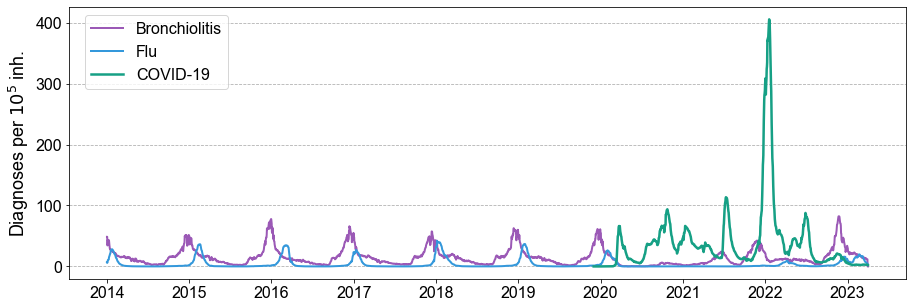

In [16]:
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})
st = datetime.date(2014,1,1); en = datetime.date(2023,4,1)
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(vri_ll['Bronquiolitis (<5 a.)'].loc[st:en], label = 'Bronchiolitis', color = '#9B59B6', linewidth = 2)
ax.plot(vri_ll['Grip (tothom)'].loc[st:en],label = 'Flu', color = '#3498DB', linewidth = 2)
ax.set_ylabel('Diagnoses per $10^5$ inh.', fontsize = 18)
ax.grid(axis='y', linestyle='--')
ax.plot(vri_ll['COVID-19 (tothom)'].loc[st:en],color='#16A085', label = 'COVID-19', linewidth = 2.5)
ax.legend(bbox_to_anchor=(-0.3, 0.5, 0.5, 0.5))
#ax.set_xlim([datetime.date(2020,1,1),datetime.date(2023,3,1)])
plt.savefig('diagnoses_all.png', dpi=1200)

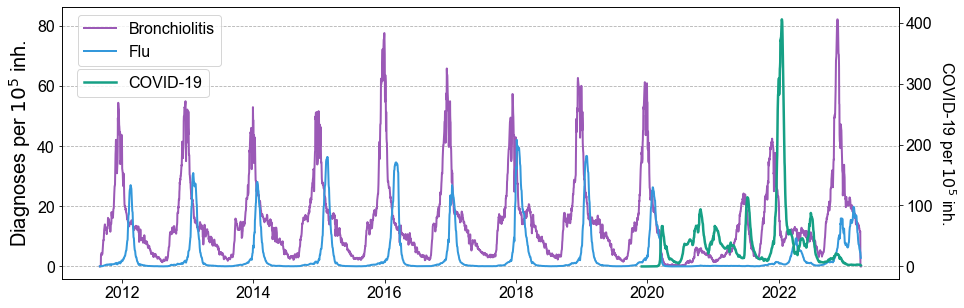

In [17]:
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(vri_ll['Bronquiolitis (<5 a.)'], label = 'Bronchiolitis', color = '#9B59B6', linewidth = 2)
ax.plot(vri_ll['Grip (tothom)'],label = 'Flu', color = '#3498DB', linewidth = 2)
ax.set_ylabel('Diagnoses per $10^5$ inh.', fontsize = 20)
ax.grid(axis='y', linestyle='--')
ax2 = ax.twinx()
ax2.plot(vri_ll['COVID-19 (tothom)'],color='#16A085', label = 'COVID-19', linewidth = 2.5)
ax2.set_ylabel('COVID-19 per $10^5$ inh.', rotation = 270, labelpad = 25)
#ax.set_xlim([datetime.date(2020,1,1),datetime.date(2023,3,1)])
ax.legend(bbox_to_anchor=(-0.3, 0.5, 0.5, 0.5))
ax2.legend(bbox_to_anchor=(-0.315, 0.3, 0.5, 0.5))
#plt.savefig('diagnoses_all_scaled_zoomed.png', dpi=1200)

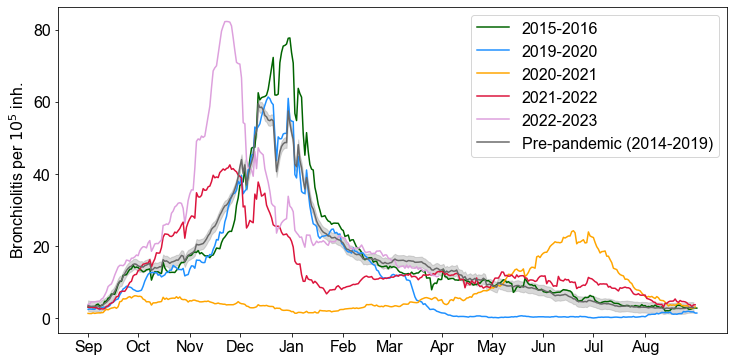

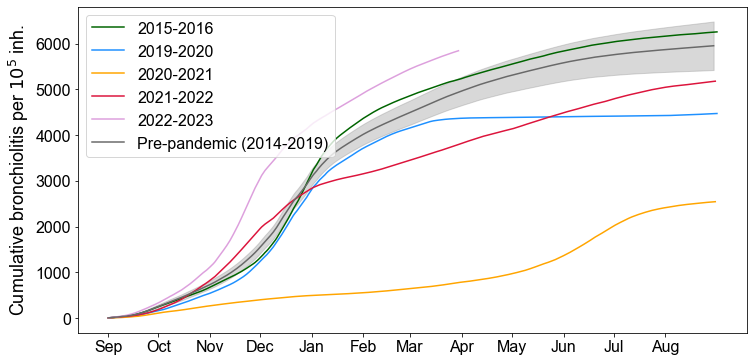

In [18]:
from scipy.stats import norm
# load data
data = vri_ll['Bronquiolitis (<5 a.)']

# define the date range for each year
date_ranges = [('2014-09-01', '2015-08-31'),
               ('2015-09-01', '2016-08-31'),
               ('2016-09-01', '2017-08-31'),
               ('2017-09-01', '2018-08-31'),
               ('2018-09-01', '2019-08-31'),
               ('2019-09-01', '2020-08-31'),
               ('2020-09-01', '2021-08-31'),
               ('2021-09-01', '2022-08-31'),
               ('2022-09-01', '2023-04-01')]

# compute means and standard deviations for each year
means = []
stds = []
save_prepandemic = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    mean = year_data.values.mean()
    std = year_data.values.std(ddof=1)
    means.append(mean)
    stds.append(std)
    save_prepandemic.append(year_data.values[0:364])

# compute the pre-pandemic mean and standard deviation
pre_pandemic_data = save_prepandemic[0:5]
pre_pandemic_mean = np.mean(pre_pandemic_data,axis=0)
pre_pandemic_std = np.std(pre_pandemic_data,ddof=1)
pre_pandemic_ci = norm.interval(0.95, loc=pre_pandemic_mean, scale=pre_pandemic_std / np.sqrt(len(pre_pandemic_mean)))

# plot the data and pre-pandemic mean
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(366),data.loc['2015-09-01':'2016-08-31'], label='2015-2016', color = '#006400')
ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'], label='2019-2020', color = '#1E90FF')
ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'], label='2020-2021', color = '#FFA500')
ax.plot(np.arange(365),data.loc['2021-09-01':'2022-08-31'], label='2021-2022', color = '#DC143C')
ax.plot(np.arange(211),data.loc['2022-09-01':'2023-03-30'], label='2022-2023', color = '#DDA0DD')
ax.plot(pre_pandemic_mean, label='Pre-pandemic (2014-2019)', color = 'dimgrey')
ax.fill_between(np.arange(len(pre_pandemic_mean)),pre_pandemic_ci[0], pre_pandemic_ci[1], alpha=0.3, color = 'grey')
ax.set_ylabel('Bronchiolitis per $10^5$ inh.')
tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.legend()
plt.savefig('bronchiolitis_daily.png', dpi=1200)

fig, ax = plt.subplots(figsize=(12, 6))
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

ax.plot(np.arange(366),data.loc['2015-09-01':'2016-08-31'].cumsum(), label='2015-2016', color = '#006400')
ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'].cumsum(), label='2019-2020', color = '#1E90FF')
ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'].cumsum(), label='2020-2021', color = '#FFA500')
ax.plot(np.arange(365),data.loc['2021-09-01':'2022-08-31'].cumsum(), label='2021-2022', color = '#DC143C')
ax.plot(np.arange(211),data.loc['2022-09-01':'2023-03-30'].cumsum(), label='2022-2023', color = '#DDA0DD')
ax.plot(np.cumsum(pre_pandemic_mean), label='Pre-pandemic (2014-2019)', color = 'dimgrey')
ax.fill_between(np.arange(len(pre_pandemic_mean)), pre_pandemic_ci[0].cumsum(), pre_pandemic_ci[1].cumsum(), alpha=0.3, color = 'grey')
ax.set_ylabel('Cumulative bronchiolitis per $10^5$ inh.', fontsize = 18)
tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.legend()
plt.savefig('bronchiolitis_cumulative.png', dpi=1200)

In [19]:
ind1 = np.argmax(vri_ll['Bronquiolitis (<5 a.)'].loc['2015-09-01':'2016-08-31'])
ind2 = np.argmax(vri_ll['Bronquiolitis (<5 a.)'].loc['2022-09-01':'2023-04-01'])
print(ind1, ind2, ind2-ind1)

121 83 -38


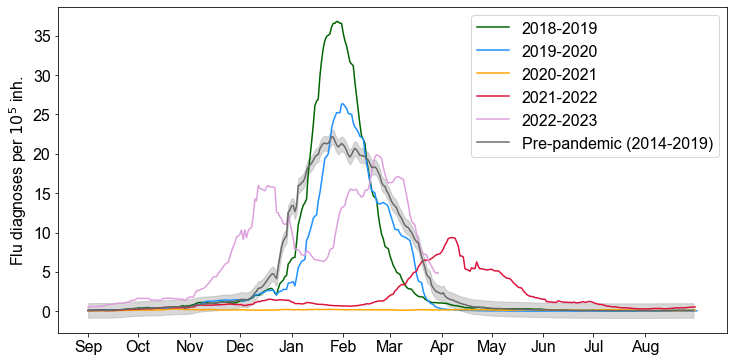

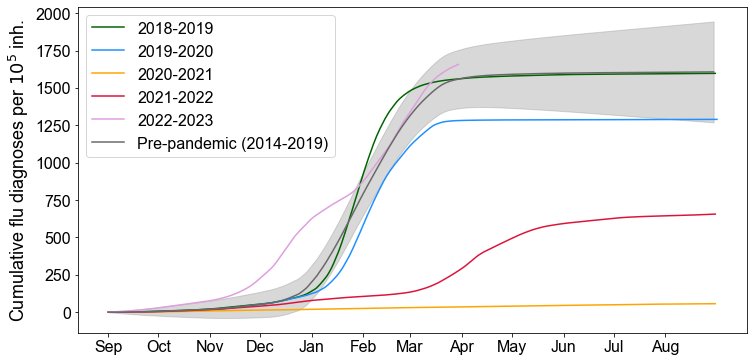

In [26]:
from scipy.stats import norm
# load data
data = vri_ll['Grip (tothom)']

# define the date range for each year
date_ranges = [('2014-09-01', '2015-08-31'),
               ('2015-09-01', '2016-08-31'),
               ('2016-09-01', '2017-08-31'),
               ('2017-09-01', '2018-08-31'),
               ('2018-09-01', '2019-08-31'),
               ('2019-09-01', '2020-08-31'),
               ('2020-09-01', '2021-08-31'),
               ('2021-09-01', '2022-08-31'),
               ('2022-09-01', '2023-04-01')]

# compute means and standard deviations for each year
means = []
stds = []
save_prepandemic = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    mean = year_data.values.mean()
    std = year_data.values.std(ddof=1)
    means.append(mean)
    stds.append(std)
    save_prepandemic.append(year_data.values[0:364])

# compute the pre-pandemic mean and standard deviation
pre_pandemic_data = save_prepandemic[0:5]
pre_pandemic_mean = np.mean(pre_pandemic_data,axis=0)
pre_pandemic_std = np.std(pre_pandemic_data,ddof=1)
pre_pandemic_ci = norm.interval(0.95, loc=pre_pandemic_mean, scale=pre_pandemic_std / np.sqrt(len(pre_pandemic_mean)))

# plot the data and pre-pandemic mean
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(365),data.loc['2018-09-01':'2019-08-31'], label='2018-2019', color = '#006400')
ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'], label='2019-2020', color = '#1E90FF')
ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'], label='2020-2021', color = '#FFA500')
ax.plot(np.arange(365),data.loc['2021-09-01':'2022-08-31'], label='2021-2022', color = '#DC143C')
ax.plot(np.arange(211),data.loc['2022-09-01':'2023-03-30'], label='2022-2023', color = '#DDA0DD')
ax.plot(pre_pandemic_mean, label='Pre-pandemic (2014-2019)', color = 'dimgrey')
ax.fill_between(np.arange(len(pre_pandemic_mean)),pre_pandemic_ci[0], pre_pandemic_ci[1], alpha=0.3, color = 'grey')
ax.set_ylabel('Flu diagnoses per $10^5$ inh.')
tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.legend()
plt.savefig('influenza_daily.png', dpi=1200)

fig, ax = plt.subplots(figsize=(12, 6))
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

ax.plot(np.arange(365),data.loc['2018-09-01':'2019-08-31'].cumsum(), label='2018-2019', color = '#006400')
ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'].cumsum(), label='2019-2020', color = '#1E90FF')
ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'].cumsum(), label='2020-2021', color = '#FFA500')
ax.plot(np.arange(365),data.loc['2021-09-01':'2022-08-31'].cumsum(), label='2021-2022', color = '#DC143C')
ax.plot(np.arange(211),data.loc['2022-09-01':'2023-03-30'].cumsum(), label='2022-2023', color = '#DDA0DD')
ax.plot(np.cumsum(pre_pandemic_mean), label='Pre-pandemic (2014-2019)', color = 'dimgrey')
ax.fill_between(np.arange(len(pre_pandemic_mean)), pre_pandemic_ci[0].cumsum(), pre_pandemic_ci[1].cumsum(), alpha=0.3, color = 'grey')
ax.set_ylabel('Cumulative flu diagnoses per $10^5$ inh.', fontsize = 18)
tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.legend()
plt.savefig('influenza_cumulative.png', dpi=1200)

In [28]:
ind1 = np.argmax(vri_ll['Grip (tothom)'].loc['2022-09-01':'2023-02-01'])
ind2 = np.argmax(pre_pandemic_mean)
print(ind1, ind2, ind2-ind1)

102 146 44


In [22]:
freq = 'W-MON'
inc_sars_setm = inc_sarscov2_tot.resample(freq).sum()
inc_sars0_setm = inc_sarscov2_0.resample(freq).sum()
inc_sars12_setm = inc_sarscov2_12.resample(freq).sum()
inc_sars34_setm = inc_sarscov2_34.resample(freq).sum()
inc_sars514_setm = inc_sarscov2_514.resample(freq).sum()
inc_sarspedia_setm = inc_sarscov2_pedia.resample(freq).sum()
inc_bronqui_setm = inc_bronquiolitis_tot.resample(freq).sum()
inc_bronqui0_setm = inc_bronquiolitis_0.resample(freq).sum()
inc_bronqui12_setm = inc_bronquiolitis_12.resample(freq).sum()
inc_bronqui34_setm = inc_bronquiolitis_34.resample(freq).sum()
inc_bronquipedia4_setm = inc_bronquiolitis_pedia4.resample(freq).sum()
inc_influ_setm = inc_influenza_tot.resample(freq).sum()
inc_influ0_setm = inc_influenza_0.resample(freq).sum()
inc_influ12_setm = inc_influenza_12.resample(freq).sum()
inc_influ34_setm = inc_influenza_34.resample(freq).sum()
inc_influ514_setm = inc_influenza_514.resample(freq).sum()
inc_influpedia_setm = inc_influenza_pedia.resample(freq).sum()

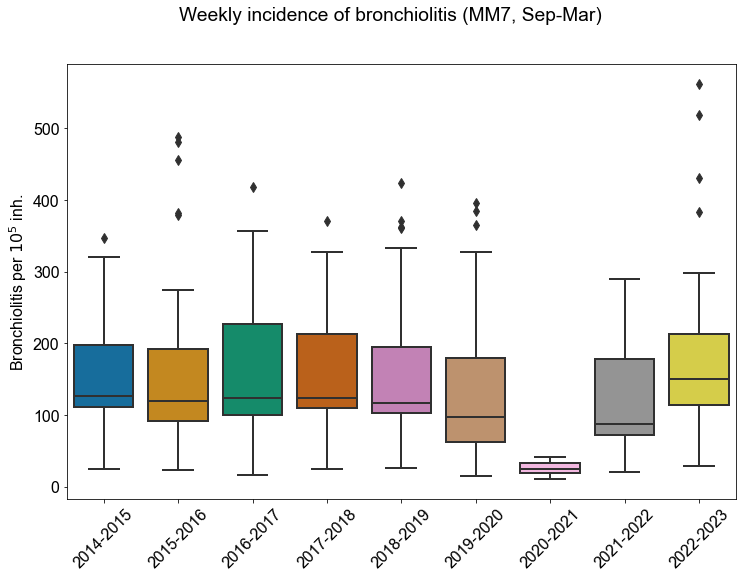

In [23]:
import seaborn as sns

# define the date range for each year
data = inc_bronquipedia4_setm

date_ranges = [('2014-09-01', '2015-04-01'),
               ('2015-09-01', '2016-04-01'),
               ('2016-09-01', '2017-04-01'),
               ('2017-09-01', '2018-04-01'),
               ('2018-09-01', '2019-04-01'),
               ('2019-09-01', '2020-04-01'),               
               ('2020-09-01', '2021-04-01'),
               ('2021-09-01', '2022-04-01'),
               ('2022-09-01', '2023-04-01')]

# compute means and standard deviations for each year
data_list = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    data_list.append(year_data.values)

# plot the boxplot with Seaborn
fig, ax = plt.subplots(figsize=(12, 8))
plt.suptitle('Weekly incidence of bronchiolitis (MM7, Sep-Mar)')
sns.boxplot(data=data_list, palette='colorblind', ax=ax, fliersize=7, linewidth=2, notch=False)
ax.set_xticklabels([f'{start_date[:4]}-{end_date[:4]}' for start_date, end_date in date_ranges])
ax.set_ylabel('Bronchiolitis per $10^5$ inh.')
plt.xticks(rotation=45)
plt.savefig('boxplot_bronquiolitis.png', dpi=1200)
plt.show()

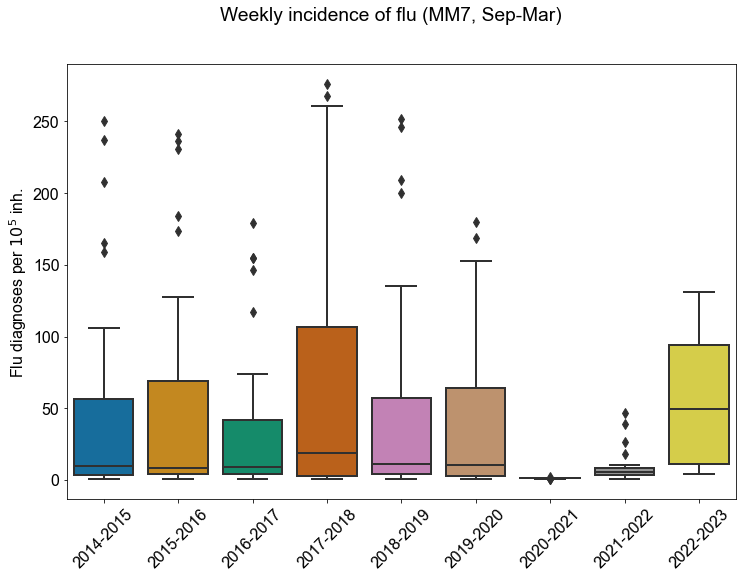

In [24]:
# define the date range for each year
data = inc_influ_setm

date_ranges = [('2014-09-01', '2015-04-01'),
               ('2015-09-01', '2016-04-01'),
               ('2016-09-01', '2017-04-01'),
               ('2017-09-01', '2018-04-01'),
               ('2018-09-01', '2019-04-01'),
               ('2019-09-01', '2020-04-01'),               
               ('2020-09-01', '2021-04-01'),
               ('2021-09-01', '2022-04-01'),
               ('2022-09-01', '2023-04-01')]

# compute means and standard deviations for each year
data_list = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    data_list.append(year_data.values)

# plot the boxplot with Seaborn
fig, ax = plt.subplots(figsize=(12, 8))
plt.suptitle('Weekly incidence of flu (MM7, Sep-Mar)')
sns.boxplot(data=data_list, palette='colorblind', ax=ax, fliersize=7, linewidth=2, notch=False)
ax.set_xticklabels([f'{start_date[:4]}-{end_date[:4]}' for start_date, end_date in date_ranges])
ax.set_ylabel('Flu diagnoses per $10^5$ inh.')
plt.xticks(rotation=45)
plt.savefig('boxplot_flu.png', dpi=1200)
plt.show()